In [1]:
import pandas as pd
import numpy as np
import re
import time
from datetime import datetime
import requests
from bs4 import BeautifulSoup

# <center>1. Data Collection </center>

</b> - Snapshot at 12.07.2022 17:00 CEST -> 19:30 CEST

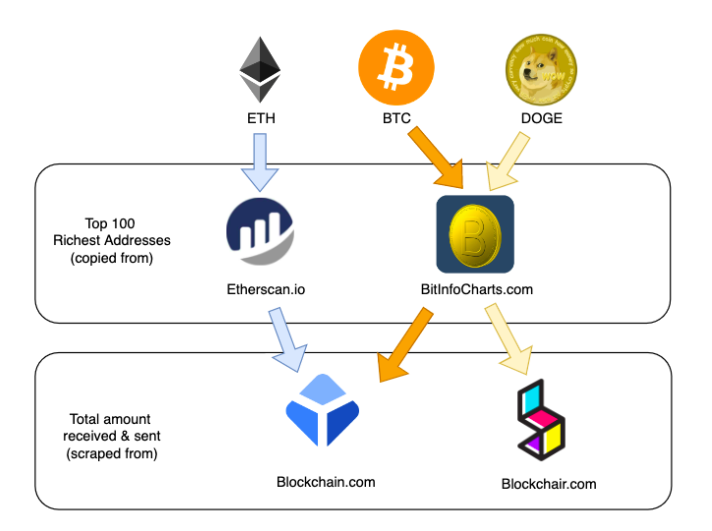

## <u> BTC</u>
- https://bitinfocharts.com/top-100-richest-bitcoin-addresses.html
- scraping blockchain.com to add in and out amounts for each wallet

In [2]:
current_supply_BTC = 19091931.00
genesis_B = datetime(2009, 1, 3) # 3 January 2009

df = pd.read_csv("Data/1. Raw/F100BTC.csv", sep=';', index_col=0, encoding = "ISO-8859-1")
df = df[df['Balance'].notna()]
df = df.drop("Bal", axis=1)
df['Balance'] = df['Balance'].str.replace(',','').str.replace('B','').astype('int32')

In [3]:
df.head(12)

,Address,% of coins,First In,Last In,Ins,First Out,Last Out,Outs,Balance,Label
ï»¿,,,,,,,,,,
1.0,34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo,1.32%,18/10/2018 14:59,20/06/2022 20:49,724.0,18/10/2018 15:19,27/01/2022 20:01,449.0,252597,Exchange
2.0,bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24...,0.8800%,16/08/2019 12:00,04/07/2022 01:27,96.0,02/02/2020 18:43,12/11/2021 14:40,78.0,168010,Exchange
3.0,1P5ZEDWTKTFGxQjZphgWPQUpe554WKDfHQ,0.6931%,06/02/2019 03:18,06/07/2022 01:40,762.0,10/02/2019 22:58,09/06/2022 23:29,82.0,132324,NaN
4.0,3LYJfcfHPXYJreMsASk2jkn69LWEYKzexb,0.6566%,17/06/2019 13:52,13/06/2022 22:41,45.0,NaN,NaN,NaN,125351,Exchange
5.0,3M219KR5vEneNb47ewrPfWyb5jQ2DjxRP6,0.5304%,13/11/2018 15:11,18/06/2022 15:28,198.0,13/11/2018 15:11,16/06/2022 01:47,196.0,101266,Exchange
6.0,bc1qazcm763858nkj2dj986etajv6wquslv8uxwczt,0.4957%,01/02/2022 05:14,09/07/2022 06:59,45.0,NaN,NaN,NaN,94643,NaN
7.0,37XuVSEpWW4trkfmvWzegTHQt7BdktSKUs,0.4950%,06/09/2019 05:30,03/06/2022 16:56,133.0,04/07/2021 05:56,04/07/2021 06:10,2.0,94505,NaN
8.0,1FeexV6bAHb8ybZjqQMjJrcCrHGW9sb6uF,0.4188%,01/03/2011 11:26,09/07/2022 06:59,425.0,NaN,NaN,NaN,79957,NaN
9.0,bc1qa5wkgaew2dkv56kfvj49j0av5nml45x9ek9hz6,0.3634%,03/11/2020 22:31,17/06/2022 00:52,47.0,NaN,NaN,NaN,69370,NaN


In [7]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36"}
url_prefix = 'https://www.blockchain.com/btc/address/'
df_ = pd.DataFrame(columns=['Address', 'In_amount', 'Out_amount'])


In [9]:
for i in df["Address"]:
    print(i)
    url = url_prefix + i
    page = requests.get(url, headers=headers)        
    soup = BeautifulSoup(page.content, 'html.parser')
    try:
        in_amount = float(re.findall("\d+\.\d+", str(soup.find_all("div", {"class": "sc-8sty72-0 bFeqhe"})[-5].find(text=True)))[0])
    except IndexError:
        in_amount = np.nan
        
    try:
        out_amount = float(re.findall("\d+\.\d+", str(soup.find_all("div", {"class": "sc-8sty72-0 bFeqhe"})[-3].find(text=True)))[0])
    except IndexError:
        out_amount=np.nan
    df_ = df_.append({'Address': i, 'In_amount': in_amount, 'Out_amount': out_amount}, ignore_index=True)
    time.sleep(5.5)

34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo
bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24sq90ecnvqqjwvw97
1P5ZEDWTKTFGxQjZphgWPQUpe554WKDfHQ
3LYJfcfHPXYJreMsASk2jkn69LWEYKzexb
3M219KR5vEneNb47ewrPfWyb5jQ2DjxRP6
bc1qazcm763858nkj2dj986etajv6wquslv8uxwczt
37XuVSEpWW4trkfmvWzegTHQt7BdktSKUs
1FeexV6bAHb8ybZjqQMjJrcCrHGW9sb6uF
bc1qa5wkgaew2dkv56kfvj49j0av5nml45x9ek9hz6
bc1qd4ysezhmypwty5dnw7c8nqy5h5nxg0xqsvaefd0qn5kq32vwnwqqgv4rzr
3Kzh9qAqVWQhEsfQz7zEQL1EuSx5tyNLNSÂ 2-of-3
1LdRcdxfbSnmCYYNdeYpUnztiYzVfBEQeC
1AC4fMwgY8j9onSbXEWeH6Zan8QGMSdmtA
35PPdr9CSZuqwi2S7vj9ResHQCVTsYuB3z
bc1qmxjefnuy06v345v6vhwpwt05dztztmx4g3y7wp
bc1qm34lsc65zpw79lxes69zkqmk6ee3ewf0j77s3h
1LruNZjwamWJXThX2Y8C2d47QqhAkkc5os
1HiCfvt2NMyoTdUtjBApabZFCd5myJWJzG
3LQUu4v9z6KNch71j7kbj8GPeAGUo1FW6a
3LCGsSmfr24demGvriN4e3ft8wEcDuHFqhÂ 2-of-2
3JZq4atUahhuA9rLhXLMhhTo133J9rF97j
bc1q7ydrtdn8z62xhslqyqtyt38mm4e2c4h3mxjkug
38UmuUqPCrFmQo4khkomQwZ4VbY2nZMJ67Â 2-of-6
bc1qcdeadk07jkthules0yw9u9ue9pklvr608ez94jgwcf7h2ldzcg6qwxp9er
12XqeqZRVkBD

In [10]:
df_BTC = pd.merge(df, df_, on='Address', how='inner')

In [11]:
df_BTC

,Address,% of coins,First In,Last In,Ins,First Out,Last Out,Outs,Balance,Label,In_amount,Out_amount
0,34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo,1.32%,18/10/2018 14:59,20/06/2022 20:49,724.0,18/10/2018 15:19,27/01/2022 20:01,449.0,252597,Exchange,1.190375e+06,9.377777e+05
1,bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24...,0.8800%,16/08/2019 12:00,04/07/2022 01:27,96.0,02/02/2020 18:43,12/11/2021 14:40,78.0,168010,Exchange,3.561659e+06,3.393649e+06
2,1P5ZEDWTKTFGxQjZphgWPQUpe554WKDfHQ,0.6931%,06/02/2019 03:18,06/07/2022 01:40,762.0,10/02/2019 22:58,09/06/2022 23:29,82.0,132324,NaN,2.319854e+05,9.966188e+04
3,3LYJfcfHPXYJreMsASk2jkn69LWEYKzexb,0.6566%,17/06/2019 13:52,13/06/2022 22:41,45.0,NaN,NaN,NaN,125351,Exchange,1.253511e+05,0.000000e+00
4,3M219KR5vEneNb47ewrPfWyb5jQ2DjxRP6,0.5304%,13/11/2018 15:11,18/06/2022 15:28,198.0,13/11/2018 15:11,16/06/2022 01:47,196.0,101266,Exchange,1.908739e+06,1.807473e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
95,bc1qm6q8tgml3cr9gpx63a5jqtj2dxlsyz4q3ghjlf,0.05238%,08/04/2022 14:20,17/06/2022 03:10,19.0,NaN,NaN,NaN,10000,NaN,1.000000e+04,0.000000e+00
96,1EU2pMence1UfifCco2UHJCdoqorAtpT7,0.05238%,29/05/2018 23:32,17/06/2022 03:10,27.0,NaN,NaN,NaN,10000,NaN,1.000000e+04,0.000000e+00
97,bc1qlkdlchlylfdkspvevnlqqlmt4l222hwva2z3n7,0.05189%,29/07/2021 19:26,17/06/2022 03:50,2.0,NaN,NaN,NaN,9906,NaN,9.905971e+03,0.000000e+00
98,bc1qg6kqkkaexnxpvle8w3zy5j7w4k9uz5rqmrx5lw,0.05188%,29/07/2021 19:26,17/06/2022 03:50,2.0,NaN,NaN,NaN,9905,NaN,9.904965e+03,0.000000e+00


In [12]:
df_BTC.to_csv("Data/2. Preprocessed/P_F100BTC.csv")

## <u> DOGE</u>
- https://bitinfocharts.com/top-100-richest-dogecoin-addresses.html
- scraping blockchair.com to add in and out amounts for each wallet

In [13]:
current_supply_DOGE = 132670000000
genesis_D = datetime(2013, 12, 6) # 6 December 2013

dfD = pd.read_csv("Data/1. Raw/F100DOGE.csv", sep=';', index_col=0, encoding = "ISO-8859-1")
dfD = dfD[dfD['Balance'].notna()]
dfD = dfD.drop("Bal", axis=1)
dfD = dfD.drop("B", axis=1)

In [15]:
dfD.head(12)

,Address,% of coins,First In,Last In,Ins,First Out,Last Out,Outs,Balance,Label
ï»¿,,,,,,,,,,
1.0,DBs4WcRE7eysKwRxHNX88XZVCQ9M6QSUSz,21.56%,06/02/2021 20:20,23/06/2022 20:36,313.0,12/04/2021 09:14,23/06/2022 20:36,72.0,2.916194e+10,Exchange
2.0,DE5opaXjFgDhFBqL6tBDxTAQ56zkX6EToX,5.36%,17/07/2019 09:41,01/07/2022 13:36,276.0,17/07/2019 10:27,25/06/2022 01:55,229.0,7.247474e+09,Exchange
3.0,DRSqEwcnJX3GZWH9Twtwk8D5ewqdJzi13k,5.07%,24/09/2019 03:35,06/07/2022 04:08,6024.0,11/11/2019 10:48,26/06/2022 04:41,5928.0,6.850847e+09,NaN
4.0,DNgY1uss7Q7LkSewUXWiRhwBFk5N84aF71,4.03%,30/03/2021 00:28,07/06/2022 21:09,78.0,09/05/2021 15:16,28/10/2021 19:27,16.0,5.443868e+09,Exchange
5.0,DDTtqnuZ5kfRT5qh2c7sNtqrJmV3iXYdGG,3.72%,11/01/2014 10:15,01/06/2022 03:03,592.0,13/01/2014 11:26,13/01/2014 11:26,1.0,5.031002e+09,Exchange
6.0,DH5yaieqoZN36fDVciNyRueRGvGLR3mr7L,1.87%,06/02/2019 03:04,21/04/2022 14:14,1261.0,10/02/2019 21:12,06/06/2022 23:05,98.0,2.532572e+09,Exchange
7.0,DGottmgfevJzhhfmvGdA2JpMjMJ1DsSKjJ,1.76%,27/01/2022 15:01,09/02/2022 03:57,7.0,25/04/2022 17:17,25/04/2022 17:17,6.0,2.381616e+09,Exchange
8.0,DDogepartyxxxxxxxxxxxxxxxxxxw1dfzr,1.37%,12/08/2014 19:30,05/07/2022 16:59,3364.0,NaN,NaN,NaN,1.854584e+09,NaN
9.0,DGmzv39riELTuigZCUD6sWoHEHPdSbxdUB,1.04%,23/05/2022 12:48,20/06/2022 21:59,23.0,NaN,NaN,NaN,1.400000e+09,Exchange


In [22]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36"}
url_prefix = 'https://blockchair.com/dogecoin/address/'
df_D = pd.DataFrame(columns=['Address', 'In_amount', 'Out_amount'])

In [24]:
for i in dfD["Address"]:
    print(i)
    url = url_prefix + i
    page = requests.get(url, headers=headers)        
    soup = BeautifulSoup(page.content, 'html.parser')
    try:
        in_amount = float(soup.find_all("span", {"class": "wb-ba"})[15].find(text=True).replace(",", ""))
    except IndexError:
        in_amount = np.nan

    try:
        out_amount = float(soup.find_all("span", {"class": "wb-ba"})[17].find(text=True).replace(",", ""))    
    except IndexError:
        out_amount = np.nan
    df_D = df_D.append({'Address': i, 'In_amount': in_amount, 'Out_amount': out_amount}, ignore_index=True)
    time.sleep(5.5)

DBs4WcRE7eysKwRxHNX88XZVCQ9M6QSUSz
DE5opaXjFgDhFBqL6tBDxTAQ56zkX6EToX
DRSqEwcnJX3GZWH9Twtwk8D5ewqdJzi13k
DNgY1uss7Q7LkSewUXWiRhwBFk5N84aF71
DDTtqnuZ5kfRT5qh2c7sNtqrJmV3iXYdGG
DH5yaieqoZN36fDVciNyRueRGvGLR3mr7L
DGottmgfevJzhhfmvGdA2JpMjMJ1DsSKjJ
DDogepartyxxxxxxxxxxxxxxxxxxw1dfzr
DGmzv39riELTuigZCUD6sWoHEHPdSbxdUB
DHQsfy66JsYSnwjCABFN6NNqW4kHQe63oU
DTXwWCTpM6pP7NtqquiMdBE385AuW1desV
D9a1Ah7mUNAJwNqHPER4DN9zNLoqcYFDZW
D8WhgsmFUkf4imvsrwYjdhXL45LPz3bS1S
D5zikmZbvK6ReZSFPDVGusqP3qKcJTjo4r
DEwbsuaPFeHtRKZKxUcxYqttroE4tXkMov
DHPVTGcxbaqPkodQ5vj6h6uDJrkf4Sg9r2
DHP3EmUAhAvWD8w4VTgn4FH37cduDhgKAA
DPEzPFx1YAg2AndcYXD9ouPiNT5izSgeHL
DJVeRemZM842GmvT6WR3PzVkqhqCEUGsDH
DLCDJhnh6aGotar6b182jpzbNEyXb3C361
DTxYRT58AY4rQ5E18PfGzSKaQt6aNjsAxD
D9FV7Ka27RVzS9NPBx3H57TUVi1hb4QS64
D6LKpBFJaf6moGenC39eXEjzAqLzYiTfdz
DGogsHSEVxeX5TVDuiJsvwK4af1WSaHgvQ
D6xiMfjQNdcGe9aVXCCUk2PyzWCxfnZww9
D61T1GVeMZM8UHvXKyyD55Ur9efAF2mb5f
DJtqonMkvsVr8rVr4Pdf5zYfZrnaLSdnwi
DBpNLLEj13LWr14wm1YH24nuqAjodrjaLL
DEAWXsx1Ge925D7gn2wC

In [25]:
df_DOGE = pd.merge(dfD, df_D, on='Address', how='inner')

In [26]:
df_DOGE = df_DOGE.drop(index=df_DOGE.index[0],axis=0)
df_DOGE

,Address,% of coins,First In,Last In,Ins,First Out,Last Out,Outs,Balance,Label,In_amount,Out_amount
1,DE5opaXjFgDhFBqL6tBDxTAQ56zkX6EToX,5.36%,17/07/2019 09:41,01/07/2022 13:36,276.0,17/07/2019 10:27,25/06/2022 01:55,229.0,7.247474e+09,Exchange,3.893638e+10,3.168891e+10
2,DRSqEwcnJX3GZWH9Twtwk8D5ewqdJzi13k,5.07%,24/09/2019 03:35,06/07/2022 04:08,6024.0,11/11/2019 10:48,26/06/2022 04:41,5928.0,6.850847e+09,NaN,6.013218e+09,-8.376293e+08
3,DNgY1uss7Q7LkSewUXWiRhwBFk5N84aF71,4.03%,30/03/2021 00:28,07/06/2022 21:09,78.0,09/05/2021 15:16,28/10/2021 19:27,16.0,5.443868e+09,Exchange,7.962395e+09,2.518527e+09
4,DDTtqnuZ5kfRT5qh2c7sNtqrJmV3iXYdGG,3.72%,11/01/2014 10:15,01/06/2022 03:03,592.0,13/01/2014 11:26,13/01/2014 11:26,1.0,5.031002e+09,Exchange,5.032002e+09,9.999999e+05
5,DH5yaieqoZN36fDVciNyRueRGvGLR3mr7L,1.87%,06/02/2019 03:04,21/04/2022 14:14,1261.0,10/02/2019 21:12,06/06/2022 23:05,98.0,2.532572e+09,Exchange,5.581285e+10,5.328028e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
95,DN6KNHT6BvuKNke3S9yP1M3h6TCgKCXj3m,0.07700%,16/08/2021 05:30,25/04/2022 21:36,49.0,NaN,NaN,NaN,1.041417e+08,NaN,1.041417e+08,0.000000e+00
96,D7fXyKdKEDhf7iDT3sSdr7Dm6W1hy4QLW3,0.07700%,16/08/2021 00:43,25/04/2022 21:36,40.0,NaN,NaN,NaN,1.041417e+08,NaN,1.041417e+08,0.000000e+00
97,D8hi4d1sGLz4UckRxPybJ1A61ifs8RsF1j,0.07700%,15/08/2021 18:29,25/04/2022 21:36,44.0,NaN,NaN,NaN,1.041417e+08,NaN,1.041417e+08,0.000000e+00
98,DHg7AcJLmRJUeiJcsSJdpoaGRm6DsittZR,0.07700%,13/08/2021 01:47,25/04/2022 21:36,42.0,NaN,NaN,NaN,1.041417e+08,NaN,1.041417e+08,0.000000e+00


In [27]:
df_DOGE.to_csv("Data/2. Preprocessed/P_F100DOGE.csv")

## <u> Eth</u>
- https://etherscan.io/accounts
- scraping blockchain.com to add in and out amounts for each wallet

In [30]:
current_supply_ETH = 121516840.8
genesis_E = datetime(2015, 7, 30) # 30 July 2015

dfE = pd.read_csv("Data/1. Raw/F100ETH.csv", sep=';', index_col=0, encoding = "ISO-8859-1")
dfE = dfE.drop("BAL", axis=1)
dfE = dfE.drop("B", axis=1)
dfE = dfE.drop("Name Tag", axis=1)
dfE = dfE.drop("Txn Count", axis=1)
dfE['Balance'] = dfE['Balance'].str.replace('Â','').str.replace('\xa0','').astype('float')

In [31]:
dfE.head(12)

,Address,Total,Balance,Label,Outs,Last Out,First Out,Ins,Last In,First In
ï»¿Rank,,,,,,,,,,
1,0x00000000219ab540356cbb839cbe05303d7705fa,20603,1.302281e+07,NaN,0,NaN,NaN,20603,12/07/2022 15:03,20/11/2022 15:03
2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,8723819,4.682719e+06,NaN,0,NaN,NaN,8723819,12/07/2022 15:31,18/01/2017 15:31
3,0xda9dfa130df4de4673b89022ee50ff26f6ea73cf,68,2.113030e+06,Exchange,1,31/03/2021 21:17,31/03/2021 21:17,67,12/07/2022 11:44,23/03/2021 00:55
4,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,1093,1.996008e+06,Exchange,962,30/05/2022 03:20,21/10/2018 12:19,131,21/05/2022 21:16,28/09/2018 03:38
5,0x73bceb1cd57c711feac4224d062b0f6ff338501e,513,1.944286e+06,NaN,104,24/06/2022 21:36,10/02/2019 21:23,409,06/07/2022 06:35,06/02/2019 02:04
6,0x9bf4001d307dfd62b26a2f1307ee0c0307632d59,105,1.490000e+06,NaN,0,NaN,NaN,105,04/07/2022 06:46,12/11/2019 02:52
7,0x742d35cc6634c0532925a3b844bc454e4438f44e,17125,1.271480e+06,Exchange,2045,11/07/2022 21:03,28/04/2018 15:43,15080,11/07/2022 13:33,28/04/2018 15:28
8,0x07ee55aa48bb72dcc6e9d78256648910de513eca,1233,7.739953e+05,Exchange,0,NaN,NaN,1233,08/07/2022 16:41,08/08/2016 17:51
9,0xf977814e90da44bfa03b6295a0616a897441acec,8696,6.784208e+05,Exchange,8582,12/07/2022 15:32,09/07/2019 14:54,114,20/06/2022 06:28,09/07/2019 14:49


In [32]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36"}
url_prefix = 'https://www.blockchain.com/eth/address/'
df_E = pd.DataFrame(columns=['Address', 'In_amount', 'Out_amount'])


In [33]:
for i in dfE["Address"]:
    print(i)
    url = url_prefix + i
    page = requests.get(url, headers=headers)        
    soup = BeautifulSoup(page.content, 'html.parser')
    try:
        in_amount = float(re.findall("\d+\.\d+", str(soup.find_all("div", {"class": "sc-8sty72-0 bFeqhe"})[-3].find(text=True)))[0])
    except IndexError:
        in_amount = np.nan
    try: 
        out_amount = float(re.findall("\d+\.\d+", str(soup.find_all("div", {"class": "sc-8sty72-0 bFeqhe"})[-5].find(text=True)))[0])
    except IndexError:
        out_amount = np.nan
    df_E = df_E.append({'Address': i, 'In_amount': in_amount, 'Out_amount': out_amount}, ignore_index=True)
    time.sleep(5.5)


0x00000000219ab540356cbb839cbe05303d7705fa
0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
0xda9dfa130df4de4673b89022ee50ff26f6ea73cf
0xbe0eb53f46cd790cd13851d5eff43d12404d33e8
0x73bceb1cd57c711feac4224d062b0f6ff338501e
0x9bf4001d307dfd62b26a2f1307ee0c0307632d59
0x742d35cc6634c0532925a3b844bc454e4438f44e
0x07ee55aa48bb72dcc6e9d78256648910de513eca
0xf977814e90da44bfa03b6295a0616a897441acec
0x011b6e24ffb0b5f5fcc564cf4183c5bbbc96d515
0x28c6c06298d514db089934071355e5743bf21d60
0xa7efae728d2936e78bda97dc267687568dd593f3
0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5
0x61edcdf5bb737adffe5043706e7c5bb1f1a56eea
0xe92d1a43df510f82c66382592a047d288f85226f
0xdf9eb223bafbe5c5271415c75aecd68c21fe3d7f
0x1b3cb81e51011b549d78bf720b0d924ac763a7c2
0xde0b295669a9fd93d5f28d9ec85e40f4cb697bae
0xca8fa8f0b631ecdb18cda619c4fc9d197c8affca
0x8484ef722627bf18ca5ae6bcf031c23e6e922b30
0x3bfc20f0b9afcace800d73d2191166ff16540258
0xc098b2a3aa256d2140208c3de6543aaef5cd3a94
0xa929022c9107643515f5c777ce9a910f0d1e490c
0x220866b1a

In [34]:
df_ETH = pd.merge(dfE, df_E, on='Address', how='inner')
df_ETH

,Address,Total,Balance,Label,Outs,Last Out,First Out,Ins,Last In,First In,In_amount,Out_amount
0,0x00000000219ab540356cbb839cbe05303d7705fa,20603,1.302281e+07,NaN,0,NaN,NaN,20603,12/07/2022 15:03,20/11/2022 15:03,1.302298e+07,0.000000e+00
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,8723819,4.682719e+06,NaN,0,NaN,NaN,8723819,12/07/2022 15:31,18/01/2017 15:31,1.699178e+07,1.816595e+07
2,0xda9dfa130df4de4673b89022ee50ff26f6ea73cf,68,2.113030e+06,Exchange,1,31/03/2021 21:17,31/03/2021 21:17,67,12/07/2022 11:44,23/03/2021 00:55,2.113030e+06,4.486550e-02
3,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,1093,1.996008e+06,Exchange,962,30/05/2022 03:20,21/10/2018 12:19,131,21/05/2022 21:16,28/09/2018 03:38,6.752538e+06,4.756526e+06
4,0x73bceb1cd57c711feac4224d062b0f6ff338501e,513,1.944286e+06,NaN,104,24/06/2022 21:36,10/02/2019 21:23,409,06/07/2022 06:35,06/02/2019 02:04,2.631148e+06,6.868608e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0xdcd0272462140d0a3ced6c4bf970c7641f08cd2c,10,1.235877e+05,Exchange,9,29/11/2020 17:45,18/02/2019 12:22,1,04/01/2019 13:26,04/01/2019 13:26,1.243878e+05,8.000000e+02
96,0xcafea35ce5a2fc4ced4464da4349f81a122fd12b,3342,1.222104e+05,NaN,0,NaN,NaN,3342,10/07/2022 13:56,26/05/2021 14:14,1.628397e+05,4.062935e+04
97,0x595faf77e533a5cd30ab5859c9a0116de8bad8db,50,1.200000e+05,NaN,0,NaN,NaN,50,05/09/2020 20:14,04/09/2020 01:09,1.200000e+05,0.000000e+00
98,0x1bd3fc5ac794e7af8e834a8a4d25b08acd9266ce,53,1.200000e+05,NaN,0,NaN,NaN,53,04/09/2020 01:09,27/07/2020 21:14,1.200000e+05,0.000000e+00


In [35]:
df_ETH.to_csv("Data/2. Preprocessed/P_F100ETH.csv")